In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=479ea22deec622a3fb76903ca22e66abaa3a2bafdddf01998a0b5b5ba61a8807
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [3]:

# تحديد URL للملف CSV
url = "https://raw.githubusercontent.com/eslamalbaik/marketing/refs/heads/main/data.csv"

# تحميل البيانات من URL باستخدام pandas
data = pd.read_csv(url, encoding='ISO-8859-1')  # قراءة الملف CSV وتحديد الترميز

# عرض أول 5 صفوف من البيانات للتأكد من التحميل الصحيح
print(data.head())  # عرض أول 5 صفوف من DataFrame


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data.shape

(541909, 8)

In [ ]:
# إزالة التكرارات من DataFrame
data.drop_duplicates(inplace=True)  # يقوم بإزالة الصفوف المتكررة ويحدث DataFrame الأصلي

# عرض إحصائيات وصفية عن البيانات
description = data.describe()  # يقوم بحساب الإحصائيات الوصفية للبيانات العددية
print(description)  # عرض الإحصائيات الوصفية


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# حساب عدد القيم غير الفارغة (غير null) في كل عمود
non_null_counts = data.notnull().sum()  # يقوم بحساب عدد القيم غير الفارغة لكل عمود في DataFrame

# عرض عدد القيم غير الفارغة لكل عمود
print(non_null_counts)  # عرض النتائج


InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [ ]:
# عرض أول 10 صفوف من DataFrame
first_10_rows = data.head(10)  # يقوم بإرجاع أول 10 صفوف من DataFrame
print(first_10_rows)  # عرض الصفوف


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,12


In [ ]:

# تعيين عمود 'InvoiceDate' كمؤشر (index) لبيانات DataFrame
data.set_index('InvoiceDate', inplace=True)


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# تحويل تاريخ المؤشر إلى تنسيق زمني (datetime) محدد
data.index = pd.to_datetime(data.index)


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [ ]:
# حساب إجمالي عدد العناصر في مجموعة البيانات
total_item = len(data)

# حساب إجمالي عدد الأيام الفريدة في فهرس تاريخ الفاتورة (InvoiceDate)
total_days = len(np.unique(data.index.date))

# حساب إجمالي عدد الأشهر الفريدة (سنة-شهر) من فهرس تاريخ الفاتورة (InvoiceDate)
total_months = len(np.unique(data.index.to_period('M')))

# طباعة النتائج
print(total_item, total_days, total_months)


541909 305 13


In [ ]:
# استكشاف شكل وهيكل مجموعة البيانات
print("Shape of the dataset:", data.shape)  # طباعة شكل مجموعة البيانات (عدد الصفوف والأعمدة)

print("\nColumns in the dataset:", data.columns)  # طباعة أسماء الأعمدة في مجموعة البيانات


Shape of the dataset: (541909, 8)

Columns in the dataset: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-d30a7d357adb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='gnuplot')


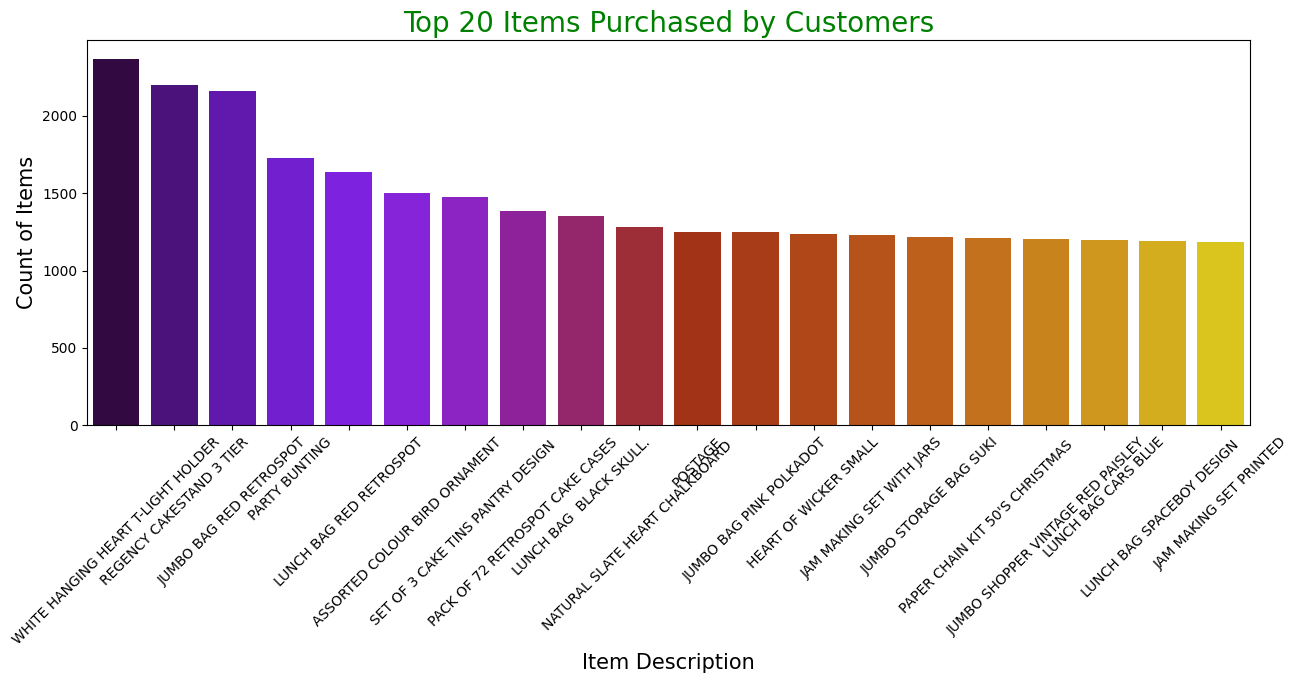

In [ ]:
# الحصول على أعلى 20 عنصر تم شراؤه بواسطة العملاء
top_items = data['Description'].value_counts().head(20)  # حساب عدد مرات ظهور كل عنصر في العمود 'Description' واختيار أعلى 20 عنصر

# إعداد حجم الشكل
plt.figure(figsize=(15, 5))  # تحديد حجم الشكل ليكون عرضه 15 بوصة وارتفاعه 5 بوصات

# إنشاء الرسم البياني العمودي
sns.barplot(x=top_items.index, y=top_items.values, palette='gnuplot')  # رسم العمود، مع استخدام الألوان من لوحة الألوان 'gnuplot'

# تعيين تسميات المحاور السينية والصادية
plt.xlabel('Item Description', size=15)  # تعيين تسمية المحور السيني
plt.ylabel('Count of Items', size=15)  # تعيين تسمية المحور الصادي

# تعيين عنوان الرسم البياني
plt.title('Top 20 Items Purchased by Customers', color='green', size=20)  # تعيين عنوان الرسم البياني بلون أخضر

# تدوير تسميات المحور السيني لتحسين القراءة
plt.xticks(rotation=45)  # تدوير تسميات المحور السيني بزاوية 45 درجة

# عرض الرسم البياني
plt.show()  # إظهار الشكل


In [ ]:
# حساب عدد مرات ظهور كل وصف في العمود 'Description'
item_counts = data['Description'].value_counts()

# عرض النتائج
print(item_counts)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [ ]:
#grouping dataset to form a list of products bought by same customer on same date
data=data.groupby(['CustomerID','InvoiceDate'])['Description'].apply(lambda x: list(x))

In [ ]:
data.head(10)

In [6]:
# تجميع البيانات لتشكيل قائمة من المنتجات التي تم شراؤها من قبل نفس العميل في نفس التاريخ
data = data.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(lambda x: list(x))


In [ ]:
from apyori import apriori
import pandas as pd

# الخطوة 2: تطبيق خوارزمية Apriori مع المعلمات المحددة
rules = apriori(transactions, min_support=0.1, min_confidence=0.1, min_lift=1, min_length=2)

# الخطوة 3: تحويل القواعد إلى قائمة واستخراج الحقول المطلوبة
results = list(rules)

# الخطوة 4: تحضير DataFrame لتخزين النتائج
formatted_results = []

# حلقة للمرور على كل نتيجة
for result in results:
    for rule in result[2]:  # العنصر الثالث يحتوي على الإحصائيات المرتبة
        antecedents = list(result[0])  # الحصول على العناصر السابقة كقائمة
        consequents = list(rule.items_add)  # الحصول على العناصر الناتجة كقائمة
        support = result.support  # قيمة الدعم
        confidence = rule.confidence  # قيمة الثقة
        lift = rule.lift  # قيمة الرفع

        # إضافة النتيجة إلى القائمة كقاموس
        formatted_results.append({
            'antecedents': antecedents,
            'consequents': consequents,
            'support': support,
            'confidence': confidence,
            'lift': lift
        })

# الخطوة 5: تحويل قائمة القواميس إلى DataFrame
results_df = pd.DataFrame(formatted_results)

# الخطوة 6: عرض DataFrame
print(results_df)

# خيار: ترتيب النتائج حسب الثقة واختيار أعلى 5 نتائج
top_results = results_df.sort_values('confidence', ascending=False).head(5)
print(top_results)


                               antecedents  \
0                       [other vegetables]   
1                             [rolls/buns]   
2                                   [soda]   
3                             [whole milk]   
4                                 [yogurt]   
5           [other vegetables, whole milk]   
6           [other vegetables, whole milk]   
7           [other vegetables, whole milk]   
8               [other vegetables, yogurt]   
9               [other vegetables, yogurt]   
10              [other vegetables, yogurt]   
11                      [rolls/buns, soda]   
12                      [rolls/buns, soda]   
13                      [rolls/buns, soda]   
14                [rolls/buns, whole milk]   
15                [rolls/buns, whole milk]   
16                [rolls/buns, whole milk]   
17                      [soda, whole milk]   
18                          [soda, yogurt]   
19                          [soda, yogurt]   
20                          [soda,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# عرض أعلى 10 قواعد
print(top_rules)

# تعريف دالة لفحص النتائج
def inspect(results):
    rhs = []          # الجانب الأيمن
    supports = []     # قيم الدعم
    confidences = []  # قيم الثقة
    lifts = []        # قيم الرفع

    # حلقة للمرور على كل نتيجة
    for result in results:
        for rule in result.ordered_statistics:
            rhs.append(tuple(rule.items_add))   # الجانب الأيمن (النتائج)
            supports.append(result.support)     # قيمة الدعم
            confidences.append(rule.confidence) # قيمة الثقة
            lifts.append(rule.lift)             # قيمة الرفع

    # إرجاع القيم كقائمة من التوائم
    return list(zip(rhs, supports, confidences, lifts))

# الخطوة 5: تحويل نتائج الفحص إلى DataFrame
ordered_results = pd.DataFrame(inspect(results), columns=['antecedents', 'Support', 'Confidence', 'Lift'])

# عرض أول 10 نتائج
print(ordered_results.head(10))


         antecedents  Support  Confidence  Lift
0  (12/1/2010 8:26,)      1.0         1.0   1.0
1         (17850.0,)      1.0         1.0   1.0
2            (2.55,)      0.2         0.2   1.0
3            (2.75,)      0.2         0.2   1.0
4            (3.39,)      0.6         0.6   1.0
5          (536365,)      1.0         1.0   1.0
6               (6,)      0.8         0.8   1.0
7           (71053,)      0.2         0.2   1.0
8               (8,)      0.2         0.2   1.0
9          (84029E,)      0.2         0.2   1.0


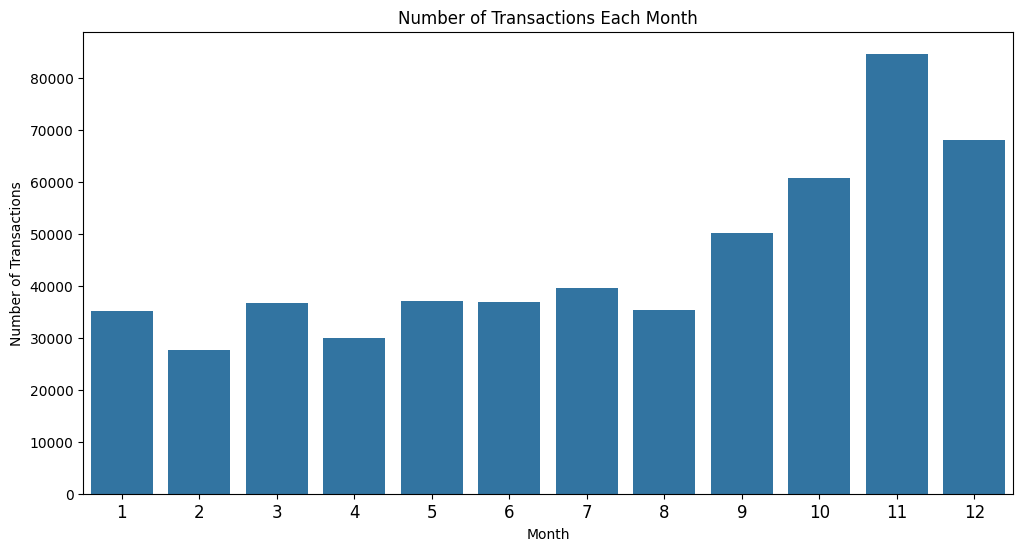

In [ ]:
# التأكد من أن عمود 'InvoiceDate' في تنسيق التاريخ والوقت
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# إنشاء عمود 'month' من خلال استخراج الشهر من 'InvoiceDate'
data['month'] = data['InvoiceDate'].dt.month

# رسم عدد المعاملات لكل شهر
plt.figure(figsize=(12, 6))

# استخدام barplot من seaborn لرسم البيانات
sns.barplot(x=data['month'].value_counts().index,  # المحور السيني: الأشهر
            y=data['month'].value_counts().values) # المحور الصادي: عدد المعاملات
plt.xticks(size=12)  # ضبط حجم نصوص المحور السيني
plt.title('عدد المعاملات لكل شهر')  # عنوان الرسم
plt.xlabel('الشهر')  # تسمية المحور السيني
plt.ylabel('عدد المعاملات')  # تسمية المحور الصادي
plt.show()  # عرض الرسم
